# TP1 A first example of statistical learning


### Table of Contents

* [1. Linear regression](#chapter1)
* [2. Polynomial regression](#chapter2)
   * [2.1 `PolynomialFeatures` 2-dimensional features](#section2_1)

We will use  the following simulated data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)
size = 100
x = np.sort(rng.uniform(-5, 5, size))
X = x.reshape(size, 1)  # See later (Question 8) for the reason why we reshape
# X into a 2-dimensional array with the same size (i.e
# same number of elements)
y = 0.5 + x**2 + x + 2 * rng.standard_normal(size)

Now let us display the data : 

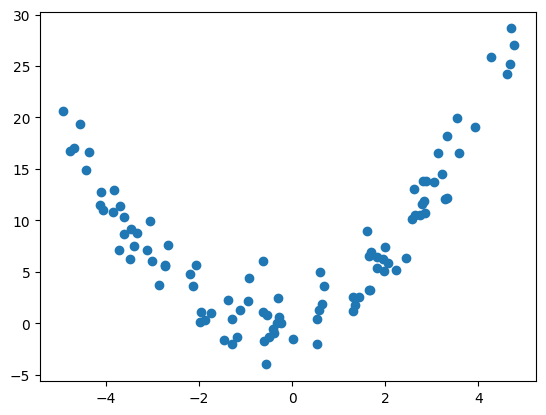

In [7]:
plt.scatter(x, y)
plt.show()

**Exercise 1** : 
1. Which variable is the *feature/input/covariable*? 
2. Which variable is the  *label/outcome/target*? 
3. What is the dimension  $X$? What is the sample size? 


In [8]:
print(X.shape, x.shape)

(100, 1) (100,)


Answer for Exercise 1 :

1. Feature : x

2. Target : y

3. The dimension of X is (100, 1) and the sample size is 100.


## 1. Linear regression <a class="anchor" id="chapter1"></a>


We will first use linear regression to model the relationship between $x$ and $y$. That is, we are looking for $\hat{a}$ and $\hat{b}$ such that $\hat{f}(x)=\hat{a}\cdot x+\hat{b}$ is close to $y$ in the sense of quadratic loss.

We will use the sklearn package  : `sklearn.linear_model.LinearRegression`. 

(Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) <-- See the example on this page. The goal is to get used to sklearn syntax as we will use this package for all sessions (except for the neural networks). 

**Exercise 2** : Define a linear regression model, named  `lin_reg`.

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

**Exercise 3** : Train the linear regression model `lin_reg` on $X$, y. If the training is successful, `lin_reg` will store the model and you will be able to access the different results using its attributes. 

In [16]:
lin_reg.fit(X, y)

LinearRegression()

**Exercise 4**: Try the following code and explain the problem. 

In [17]:
lin_reg.fit(x, y)  # we used x instead of X

ValueError: Expected 2D array, got 1D array instead:
array=[-4.9263773  -4.77287927 -4.69182165 -4.56196234 -4.41697258 -4.36182744
 -4.12350081 -4.09952139 -4.05822652 -3.85469926 -3.81994098 -3.71886367
 -3.70078495 -3.60247516 -3.60203002 -3.47687897 -3.45710508 -3.38728221
 -3.3302708  -3.10528641 -3.05361292 -3.00091798 -2.85415327 -2.73090651
 -2.72761278 -2.66060514 -2.18616108 -2.11671896 -2.06406242 -1.98487911
 -1.96049902 -1.87633359 -1.74174642 -1.45474032 -1.38187389 -1.29540294
 -1.29201976 -1.18978774 -1.12521621 -0.93613139 -0.91471356 -0.63282611
 -0.62848081 -0.6112156  -0.56585801 -0.53843724 -0.49614062 -0.41084224
 -0.3812277  -0.33278996 -0.30444189 -0.28903794 -0.24295074  0.01044775
  0.53579401  0.54584787  0.57032152  0.59207161  0.65236106  0.68741196
  1.30282593  1.31664399  1.3471832   1.4386512   1.61916515  1.6431354
  1.64850857  1.68402962  1.69813995  1.82495504  1.83048953  1.96320375
  1.97368029  2.00265102  2.05165379  2.22359351  2.44762156  2.5808774
  2.61139702  2.64998857  2.73956049  2.78383497  2.80729031  2.83898209
  2.86064305  2.86924378  3.04764357  3.14020385  3.22761613  3.27631172
  3.32259801  3.32678196  3.53403073  3.5859792   3.93121121  4.26764989
  4.61897665  4.67509732  4.70698024  4.75622352].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

The same *problem* arises very often with sklearn : we will have to use `reshape` for one-dimensional features. Some extra info about `reshape`:

In [20]:
a = np.arange(6).reshape(2, 3)
# 3 ways to reshape the array a into a 3 x 2 array
b = a.reshape(3, 2)
b2 = a.reshape(3, -1)  # -1 means "guess" the number
b3 = a.reshape(-1, 2)  # same
# obviously reshape(4,-1) would not work here as 2 X 3=6 is not
# divisible by 4...
print(a)
print(b)
print(b2)
print(b3)

[[0 1 2]
 [3 4 5]]
[[0 1]
 [2 3]
 [4 5]]
[[0 1]
 [2 3]
 [4 5]]
[[0 1]
 [2 3]
 [4 5]]


**Exercise 5** : 

(1) Compute $\hat{y}$ and the plot the line estimated by the model. 
<details> 
<summary>Click here for a hint</summary>
You can use  `lin_reg.predict`. 
</details>

(2) Predict the value of $y$ for  x=1. 

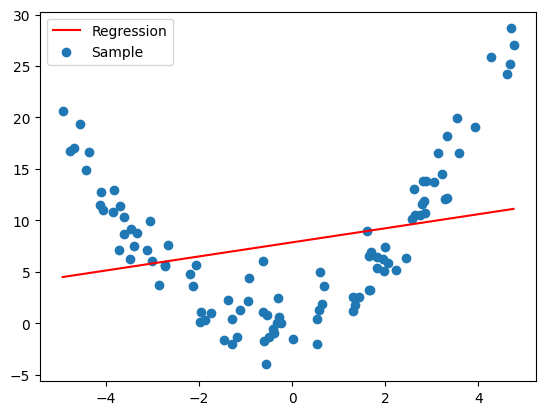

The estimated value for x=1 is [8.54372371]


In [52]:
y_predict = lin_reg.predict(X)
plt.plot(X, y_predict, color="r", label="Regression")
plt.scatter(X, y, label="Sample")
plt.legend()
plt.show()

y_1 = lin_reg.predict([[1]])
print("The estimated value for x=1 is", y_1)

**Exercise 6** : Display the coefficients $\hat{a}$ and $\hat{b}$ computed by  `lin_reg`. 

In [30]:
print("The estimated coefficients are  a=", lin_reg.coef_, ", b=", lin_reg.intercept_)

The estimated coefficients are  a= [0.6841386] , b= 7.8595851113619375


**Exercise 7** : Calculate the quadratic error  $\sum_{i=1}^{100}(y_i-\hat{y}_i)^2$.

In [31]:
print(np.sum((y - y_predict) ** 2))

4906.471161398307


**Exercise 8** : What does the next line of code compute ?  (see the doc :  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.)

In [32]:
lin_reg.score(X, y)

0.06603572054935491

The output is the $R^2$ coefficient. It is far from 1, which means that the model is not perfect.

## 2.Polynomial regression <a class="anchor" id="chapter2"></a>


We seek 3 coefficients $\hat{a}$, $\hat{b}$ and $\hat{c}$ such that $\hat{f}(x)=\hat{a}\cdot x^{2}+\hat{b}\cdot x +\hat{c}$ is close to  $y$ with respect to the quadratic loss. 

**Exercise 9** : Create a new 2-dimensional array named `X2`, of  dimension $100\times$2, the first column of which is $x^2$, and the second column is $x$.

In [36]:
X2 = np.array([x**2, x]).T
print(X2.shape)

(100, 2)


**Exercise 10** : Fit a new model, named `poly2_reg`, which will be the linear regression  of  `y` on `X2`  (which will correspond to  2nd degree polynomial regression of `y` on `X`).

In [37]:
poly2_reg = LinearRegression()
poly2_reg.fit(X2, y)

LinearRegression()

**Exercise 11** : 

(1) Plot the second degree polynomial estimated by `poly2_reg` 
<details> 
    <summary> Hint </summary> you can use`poly2_reg.predict`. 
</details>        
 

(2) Predict the value of   $y$ for  x=1 using `poly2_reg`.

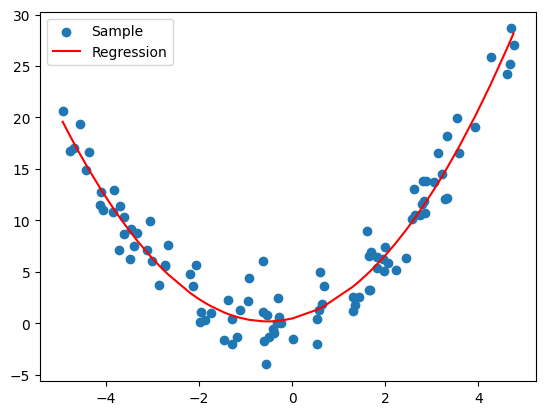

The estimated value for x=1 is [2.51857814]


In [50]:
# Answer for Exercise 11
y2_predict = poly2_reg.predict(X2)
plt.scatter(x, y, label="Sample")
plt.plot(x, y2_predict, color="r", label="Regression")

plt.legend()
plt.show()

y2_1 = poly2_reg.predict([[1, 1]])
print("The estimated value for x=1 is", y2_1)  # add your code

**Exercise 12** : Display the estimated coefficients $\hat{a}$, $\hat{b}$, $\hat{c}$. 

In [45]:
print(
    "The estimated coefficients are  a=",
    poly2_reg.coef_[0],
    ", b=",
    poly2_reg.coef_[1],
    "and c=",
    poly2_reg.intercept_,
)

The estimated coefficients are  a= 1.0030014670964114 , b= 1.0581583492954199 and c= 0.4574183201104409


**Exercise 13** : Display the quadratic error of `poly2_reg` and compare with the quadratic error related to `lin_reg`. 

In [46]:
print(
    "Quadratic error for the 2nd degree polynomial regression",
    np.sum((y - y2_predict) ** 2),
)

Quadratic error for the 2nd degree polynomial regression 381.2677328521117


The creation of the array  $[X^2, X]$ from $X$ can also be performed directly by by `sklearn.preprocessing.PolynomialFeatures`

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

(Pay attention to  the order of the features in the output of  `PolynomialFeatures` : $X\rightarrow [1, X, X^2]$ )

**Exercice 13** : In the cell below, we show how to use `PolynomialFeatures`in our example. Examine the syntax and then create a model for a $3^{rd}$ degree polynomial. 

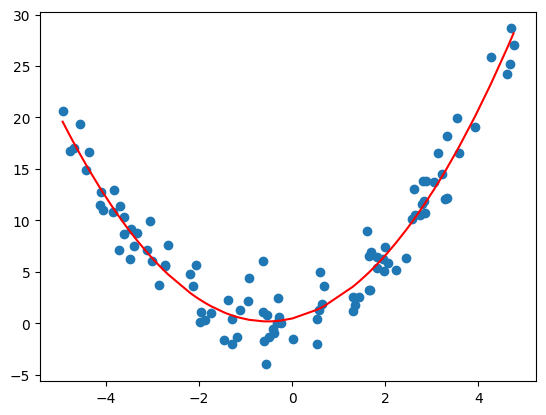

[0.         1.05815835 1.00300147] 0.45741832011044625
The estimated coefficients are  a= 1.0030014670964105 , b= 1.0581583492954199 and c= 0.45741832011044625


In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=2)  # definition of the transformer
# no calculation made yet
poly2.fit(X)  # here you ask your transformer to make some calculations
# no output yet (no assignment here)
X2_bis = poly2.transform(X)  # here you ask your transformer for an output
# (assignment 'X21_bis=...'). Your new array X2_bis now contains
# $[1,X,X^2]$

# Fitting a linear regression model as before (y on X2_bis)
poly2_bis_reg = LinearRegression()
poly2_bis_reg.fit(X2_bis, y)

# Plotting the estimated polynomial
plt.scatter(x, y)
plt.plot(x, poly2_bis_reg.predict(X2_bis), color="r")
plt.show()

# estimated coefficients (Pay attention to the order)
print(poly2_bis_reg.coef_, poly2_bis_reg.intercept_)
print(
    "The estimated coefficients are  a=",
    poly2_bis_reg.coef_[2],
    ", b=",
    poly2_bis_reg.coef_[1],
    "and c=",
    poly2_bis_reg.intercept_,
)

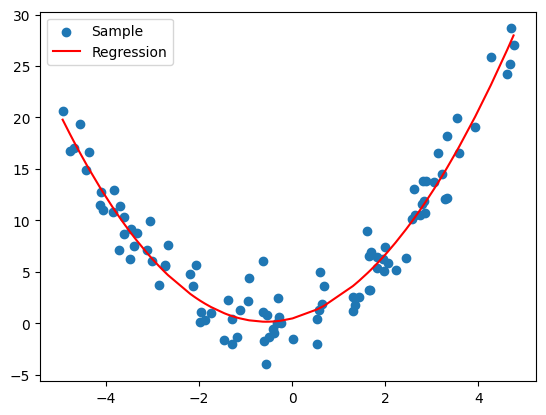

[ 0.          1.11490357  1.00197225 -0.0042044 ] 0.45683227934303705
The estimated coefficients are  a= -0.00420440206943242 , b= 1.0019722513203924 , c= 1.1149035682964386 and d= 0.45683227934303705


In [61]:
# Answer for Exercise 13 ($3^{rd}$ degree)
poly3 = PolynomialFeatures(degree=3)
poly3.fit(X)
X3_bis = poly3.transform(X)

poly3_reg = LinearRegression()
poly3_reg.fit(X3_bis, y)

plt.scatter(x, y, label="Sample")
plt.plot(x, poly3_reg.predict(X3_bis), color="r", label="Regression")
plt.legend()
plt.show()

print(poly3_reg.coef_, poly3_reg.intercept_)
print(
    "The estimated coefficients are  a=",
    poly3_reg.coef_[3],
    ", b=",
    poly3_reg.coef_[2],
    ", c=",
    poly3_reg.coef_[1],
    "and d=",
    poly3_reg.intercept_,
)

### 2.1 `PolynomialFeatures` for 2-dimensional features <a class="anchor" id="section2_1"></a>

**Exercise 14** : Examine the next 3 cells and their outputs. Foir an output  $X=(x_1,x_2)$, what do  the output of `PolynomialFeatures(2)` and the output of  `PolynomialFeatures(2, interaction_only=True)` correspond to?

In [62]:
XX = np.arange(6).reshape(3, 2)
print(XX)

[[0 1]
 [2 3]
 [4 5]]


In [63]:
poly2 = PolynomialFeatures(2)
poly2.fit_transform(XX)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [64]:
poly2_bis = PolynomialFeatures(2, interaction_only=True)
poly2_bis.fit_transform(XX)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

### Answer for Exercise 14
The output of PolynomialFeatures(2) corresponds to $[1, x_1, x_2, x_1^2, x_1x_2, x_2^2]$

The output of PolynomialFeatures(2, interaction_only=True) corresponds to $[1, x_1, x_2, x_1x_2]$